<a href="https://colab.research.google.com/github/shintafiaa/TeachingAssisting-ML/blob/main/SVR_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Prompt: beri kode untuk membaca dataset menjadi dataframe

In [15]:
import pandas as pd

# Ganti 'file_path.csv' dengan jalur file CSV sesuai kebutuhan Anda
file_path = '/content/gdrive/MyDrive/Dataset/Salary_Data_Simple_SVR.csv'

# Membaca file CSV menjadi DataFrame
df = pd.read_csv(file_path)

# Tampilkan DataFrame
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [17]:
# Import library
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Data
# Gantilah bagian ini dengan data Anda
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inisialisasi model SVR dengan hyperparameter tertentu
svr_model = SVR(C=1000, gamma=0.05, kernel='rbf')

# Melatih model
svr_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = svr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Sekarang model SVR dengan hyperparameter yang telah ditentukan sudah dilatih dan diuji.
# Anda dapat menggunakannya untuk membuat prediksi pada data baru.

Mean Squared Error: 847571769.0222917


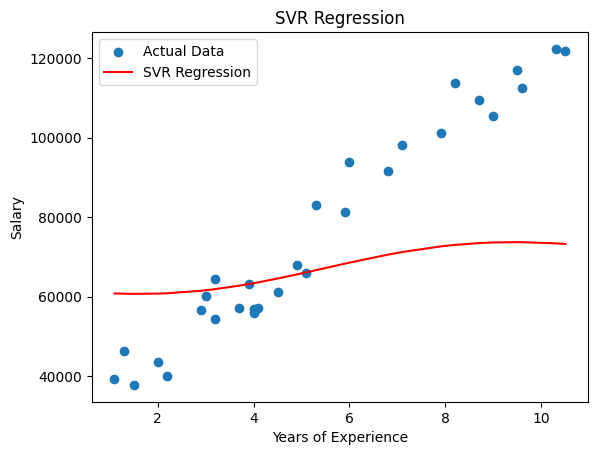

In [18]:
import matplotlib.pyplot as plt

# Visualisasi data dan model
plt.scatter(X, y, label='Actual Data')
plt.plot(X, svr_model.predict(X), color='red', label='SVR Regression')

# Label sumbu
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Menambahkan judul
plt.title('SVR Regression')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV

# Tentukan hyperparameter yang akan diuji
param_grid = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(svr_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Gunakan model terbaik untuk membuat prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 34793830.40532557


In [22]:
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, gamma=0.005)

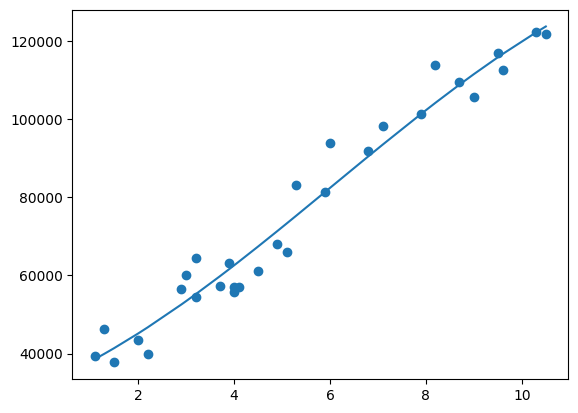

In [23]:
#visualisasikan model
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))